In [1]:
!pip install geopandas pandas matplotlib

In [1]:
!pip install sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [3]:
# List all tables (layers) in the GeoPackage using the sqlite3 connection
cursor.execute("SELECT table_name FROM gpkg_contents;")
layers = cursor.fetchall()
print("Layers in GeoPackage:", [layer[0] for layer in layers])

Layers in GeoPackage: ['v_at_vg', 'v_vg5000_f', 'v_vg5000_gem', 'v_vg5000_krs', 'v_vg5000_lan', 'v_vg5000_li', 'v_vg5000_rbz', 'v_vg5000_sta', 'v_vg5000_vwg', 'v_vg_ibz', 'v_vg_sn_zahl', 'v_vgtb_att_vg', 'v_vgtb_azb_vg', 'v_vgtb_rgs_vg', 'v_vz5000_gem', 'v_werte_ade', 'v_werte_agz', 'v_werte_bsg', 'v_werte_fks3', 'v_werte_gf', 'v_werte_gm5', 'v_werte_gmk', 'v_werte_nbd', 'v_werte_rdg', 'v_werte_spr', 'vg5000_gem', 'vg5000_krs', 'vg5000_lan', 'vg5000_li', 'vg5000_rbz', 'vg5000_sta', 'vg5000_vwg', 'vg_daten', 'vg_ibz', 'vg_werte', 'vgtb_azb_vg', 'vgtb_rgs_vg', 'vgtb_vz_gem']


OperationalError: no such table: gpkg_ogr_contents

In [2]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [2]:
import geopandas
import zipfile
import os
import matplotlib.pyplot as plt # Often useful for customization
import pandas as pd

geopackage_path = "data/DE_VG5000.gpkg"
table_path = 'data/testdataset.csv'
# Similar to shapefiles, adjust the path if your zip contains multiple layers or folders.
# If your GeoPackage has multiple layers, you might need to specify the layer:
# gdf_gpkg = geopandas.read_file(geopackage_path, layer='my_specific_layer')

gdf = geopandas.read_file(geopackage_path, layer='vg5000_krs')
df = pd.read_csv(table_path, sep=';', decimal=',')



In [6]:
gdf['AGS'] = df['AGS'].astype(str)
print(gdf.dtypes)



KeyError: 'AGS'

In [5]:
df = df.rename(columns={'ID': 'AGS'})
df['AGS'] = df['AGS'].astype(str)

print(df.dtypes)


KeyError: 'AGS'

In [83]:
gdf = gdf.merge(df, on='AGS', how='left')

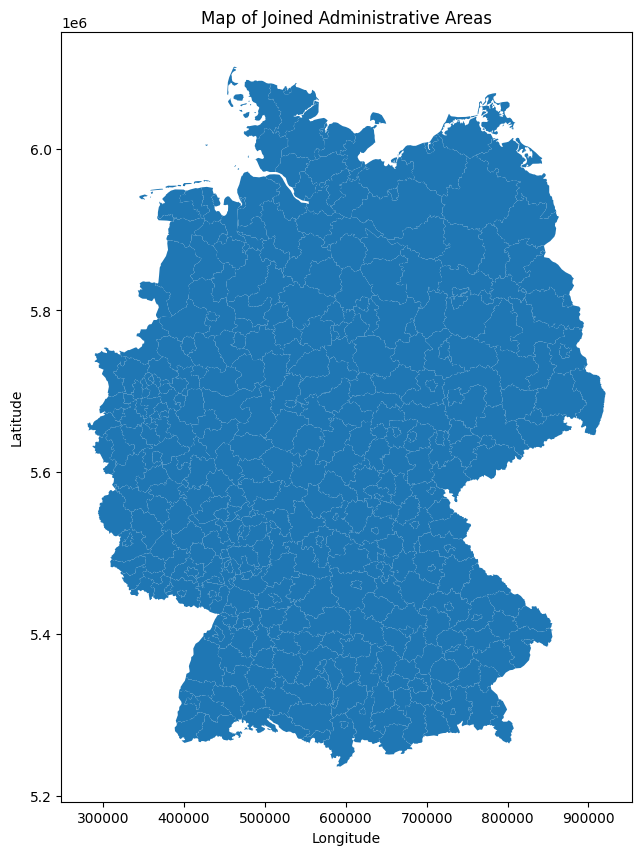

In [3]:
import matplotlib.pyplot as plt
import geopandas # Assuming joined_data is already a GeoDataFrame

gdf.plot(figsize=(10, 10)) # Adjust figsize as needed
plt.title("Map of Joined Administrative Areas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


NameError: name 'joined_data' is not defined

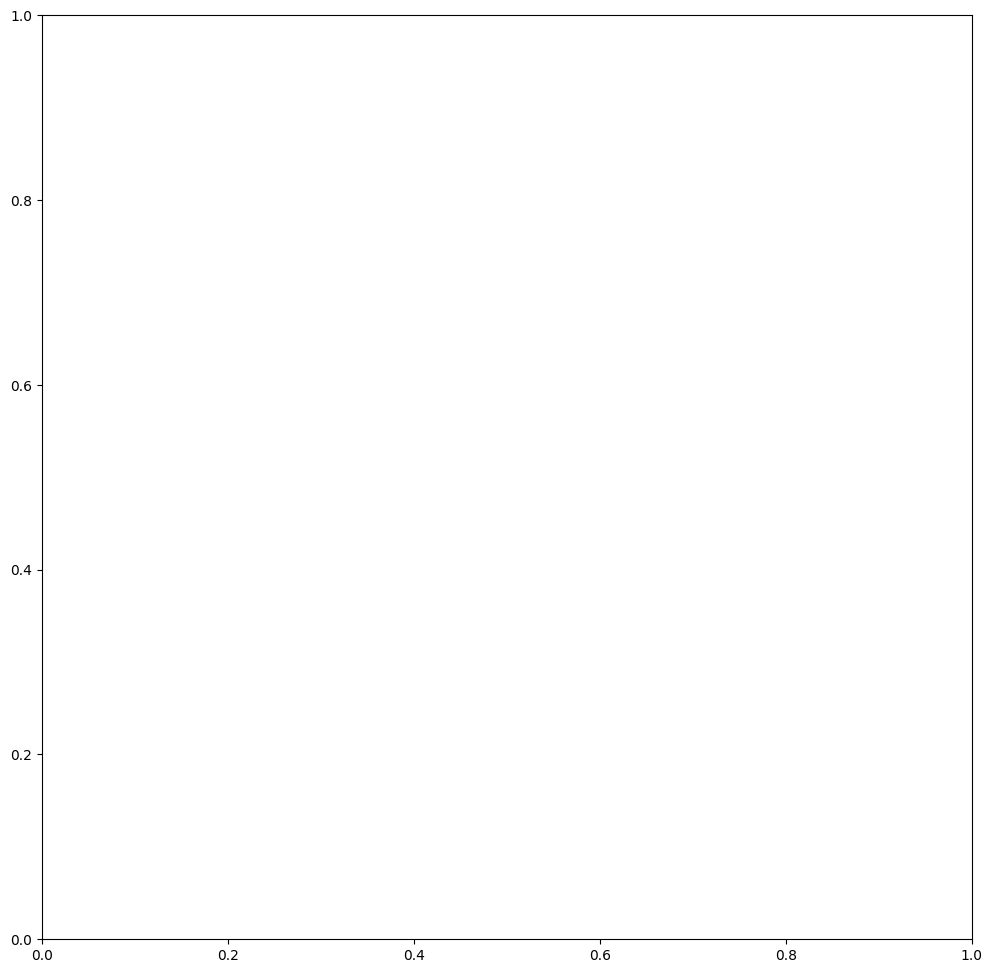

In [4]:
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    # Plot the data, coloring by the 'Population' column
    # 'cmap' (colormap) visualizes numerical values. 'viridis' is a good default.
    # 'legend=True' displays a color bar.
    joined_data.plot(column='preis_miet_best',
                     cmap='viridis',
                     edgecolor='black', # Add black borders for clarity
                     linewidth=0.5,
                     ax=ax) # Pass the axes object

    ax.set_title("Administrative Areas by Population")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()


In [ ]:

gdf.plot(column='Category',
                    figsize=(10, 10),
                    legend=True,
                    edgecolor='black',
                    linewidth=0.5,
                    cmap='tab20') # 'tab20' is a good categorical colormap
plt.title("Administrative Areas by Category")
plt.show()